In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data loading:

In [3]:
data=pd.read_csv("Online_Retail.csv",encoding='iso8859_2')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.isna().sum()/data.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data.reset_index(inplace=True,drop=True)

In [9]:
data.isna().sum()/data.shape[0]

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### **feature extraction**:

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [13]:
data["totalprice"]=data['Quantity']* data['UnitPrice']


In [14]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='mixed')

In [15]:
data['InvoiceDate']

0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
406824   2011-09-12 12:50:00
406825   2011-09-12 12:50:00
406826   2011-09-12 12:50:00
406827   2011-09-12 12:50:00
406828   2011-09-12 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [19]:
cid=data.groupby(by='CustomerID',group_keys=True).apply(lambda x:x)

In [26]:
data.groupby(by='CustomerID')['InvoiceNo'].nunique()

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [ ]:
data.groupby(by='CustomerID')['StockCode'].nunique()

In [ ]:
data.groupby(by='CustomerID')['Quantity'].sum()

In [35]:
total_item=[]
total_reject=[]
buy_total=[]
reject_total=[]
for id in set(x[0] for x in cid.index):
    total_item.append(cid.loc[id]['Quantity'][cid.loc[id]['Quantity']>0].sum())
    total_reject.append(cid.loc[id]['Quantity'][cid.loc[id]['Quantity']<0].sum())
    buy_total.append(cid.loc[id]['totalprice'][cid.loc[id]['totalprice']>0].sum())
    reject_total.append(cid.loc[id]['totalprice'][cid.loc[id]['totalprice']>0].sum())

In [68]:
[data.loc[x]['Country'] for x in cid]

['United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Lithuania',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom'

In [62]:
len(cid)

4372

In [64]:
cid=[x[0] for x in data.groupby(by="CustomerID")['CustomerID'].unique().values ]
customerdata=pd.DataFrame({'customerdata':cid,'invoice':data.groupby(by='CustomerID')['InvoiceNo'].nunique(),'stockcode':data.groupby(by='CustomerID')['StockCode'].nunique(),'buy':total_item,'reject':total_reject,'buy_price':buy_total,'reject_price':reject_total,'nation':[data.loc[x]['Country'] for x in cid]})

In [70]:
customerdata['nation'].unique()

array(['United Kingdom', 'Lithuania', 'Norway', 'Germany', 'France',
       'Japan', 'Portugal', 'Channel Islands', 'Denmark', 'EIRE', 'Spain'],
      dtype=object)

In [74]:
customerdata.set_index("customerdata",inplace=True)

In [80]:
customerdata

,invoice,stockcode,buy,reject,buy_price,reject_price,nation
customerdata,,,,,,,
12346.0,2,1,260,0,584.50,584.50,United Kingdom
12347.0,7,103,261,0,555.89,555.89,United Kingdom
12348.0,4,22,224,0,317.20,317.20,United Kingdom
12349.0,1,73,44,0,94.36,94.36,United Kingdom
12350.0,1,17,1242,-12,1382.07,1382.07,United Kingdom
...,...,...,...,...,...,...,...
18280.0,1,10,1500,0,676.20,676.20,United Kingdom
18281.0,1,7,267,0,362.95,362.95,United Kingdom
18282.0,3,12,1410,-2,2157.40,2157.40,United Kingdom


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

customerdata['nation'] = le.fit_transform(customerdata['nation'])

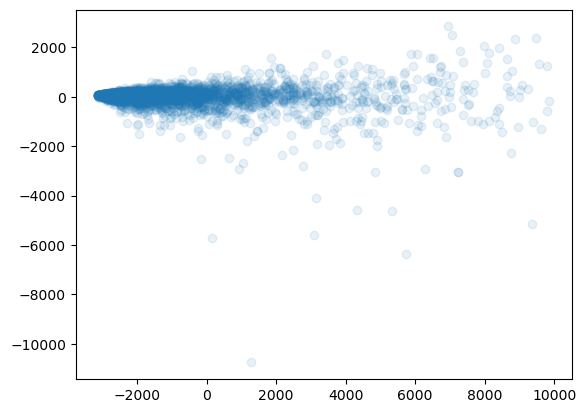

In [89]:
from sklearn.decomposition  import PCA
x_2d=PCA(n_components=2).fit_transform(customerdata)
plt.scatter(x_2d[x_2d[:,0]<10000,0],x_2d[x_2d[:,0]<10000,1],alpha=0.1)

### CLUSTERING:

In [131]:
from sklearn.preprocessing import MinMaxScaler as mm

In [133]:
m=mm().fit_transform(customerdata)

In [137]:
from sklearn.cluster import KMeans,MeanShift,DBSCAN

In [151]:
K=20
km=KMeans(n_clusters=K,n_init='auto')
km.fit(m)

KMeans(n_clusters=20, n_init='auto')

In [165]:
from sklearn.metrics import calinski_harabasz_score as callinski
inertia=[]
k_list=[]
kallinski=[]
for k in range(2,40):
    km=KMeans(n_clusters=k,n_init='auto')
    km.fit(m)
    inertia.append(km.inertia_)
    kallinski.append(callinski(X=m,labels=km.predict(m)))
    k_list.append(k)

In [166]:
np.unique(km.predict(m))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [167]:
km.inertia_

1.9668599860506126

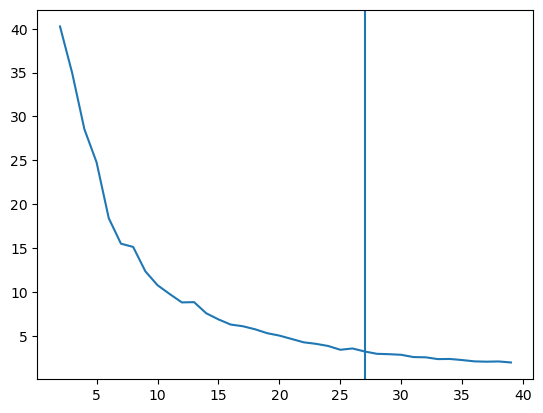

In [179]:
plt.plot(k_list,inertia)
plt.axvline(27)

# optimized k=27

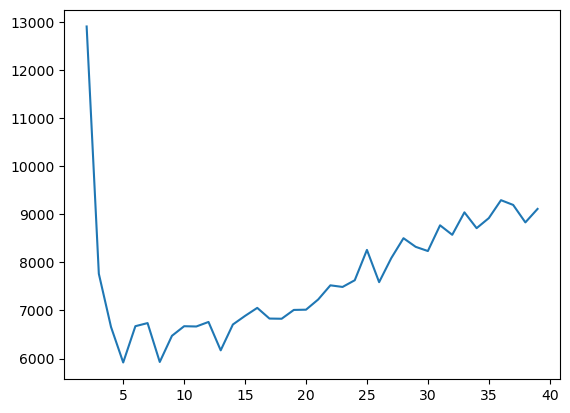

In [181]:
plt.plot(k_list,kallinski)

# mean-shift

In [185]:
km=MeanShift(bandwidth=1000)
km.fit(m)

MeanShift(bandwidth=1000)

In [209]:
for k in np.arange(3000,20000,1000):
    km=MeanShift(bandwidth=k)
    km.fit(customerdata)
    print(k,callinski(X=m,labels=km.predict(customerdata)))

3000
3000 11.15568767695691
4000
4000 12.733834871226387
5000
5000 13.803802176561021
6000
6000 16.151110529034327
7000
7000 16.793218618387353
8000
8000 18.934193727894105
9000
9000 19.732982731790102
10000
10000 20.5766887648574
11000
11000 21.463794195667127
12000
12000 23.627050667201058
13000
13000 23.651882089614187
14000
14000 29.63803393275981
15000
15000 29.718474908608574
16000
16000 29.718474908608574
17000
17000 29.718474908608574
18000
18000 31.749970050672946
19000
19000 29.776141035505884


## erasing outliers

In [220]:
Q1=customerdata['invoice'].quantile(0.25)
Q2=customerdata['invoice'].quantile(0.75)
IQR=Q2-Q1
MAX=Q2+1.5*IQR
customerdata=customerdata[customerdata['invoice']<MAX]

In [224]:
for k in np.arange(1000,20000,1000):
    km=MeanShift(bandwidth=k)
    km.fit(customerdata)
    print(k,callinski(X=customerdata,labels=km.predict(customerdata)))

3000 4391.94256405597
4000 3379.9533800112154
5000 3514.37200916587
6000 3574.0608704886236
7000 2564.181703087365
8000 2857.7505551115964
9000 2990.491021586156
10000 3174.5114014830924
11000 3293.257551091246
12000 3488.1233299697406
13000 3228.4812456171935
14000 3797.913048683862
15000 3797.913048683862
16000 3718.379498104248
17000 3797.913048683862
18000 4073.3667750931513
19000 3933.9941557158313


In [269]:
np.unique(km.predict(customerdata))

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [233]:
m=mm().fit_transform(customerdata)

# DBscan

In [271]:
km=DBSCAN(eps=0.1,min_samples=4)
labels=km.fit_predict(m)

In [273]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

In [275]:
sum(labels[labels==-1])

-112

In [291]:
customerdata.iloc[labels==10,:]

,invoice,stockcode,buy,reject,buy_price,reject_price,nation
customerdata,,,,,,,
12882.0,2,12,49,0,117.35,117.35,7
12897.0,2,3,88,0,251.52,251.52,7
12904.0,2,59,788,0,1078.96,1078.96,7
12915.0,2,19,43,0,126.12,126.12,7
12925.0,2,42,2164,0,3989.57,3989.57,7
12929.0,2,8,819,0,1412.94,1412.94,7
12944.0,2,29,235,0,357.77,357.77,7
